# Recommendation model #

In [12]:
# Gnerated the data then did all preprocessing and feature engineering and model building and deployment using flask

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

np.random.seed(42)

def generate_better_synthetic_data(n=50000):
    age = np.random.randint(18, 75, size=n)
    gender = np.random.choice(['Male', 'Female'], size=n)
    income = np.random.normal(60000, 20000, size=n).clip(15000, 150000).astype(int)
    marital_status = np.random.choice(['Single', 'Married', 'Divorced', 'Widowed'], size=n)
    children = np.random.poisson(1.5, size=n)
    employment_status = np.random.choice(['Employed', 'Self-employed', 'Unemployed', 'Retired'], size=n)
    health_score = np.random.randint(1, 11, size=n)
    owns_home = np.random.choice([0, 1], size=n)
    credit_score = np.random.normal(650, 70, size=n).clip(300, 850).astype(int)
    past_claims = np.random.poisson(0.5, size=n)
    vehicles_owned = np.random.randint(0, 4, size=n)
    years_with_company = np.random.randint(0, 20, size=n)

    df = pd.DataFrame({
        'age': age,
        'gender': gender,
        'income': income,
        'marital_status': marital_status,
        'children': children,
        'employment_status': employment_status,
        'health_score': health_score,
        'owns_home': owns_home,
        'credit_score': credit_score,
        'past_claims': past_claims,
        'vehicles_owned': vehicles_owned,
        'years_with_company': years_with_company
    })

    # Add small noise to simulate real-world unpredictability
    noise = np.random.rand(n)
    
    def recommend(row, noise):
        if row['health_score'] < 4 and noise < 0.7:
            return 'Health Insurance'
        elif row['vehicles_owned'] > 0 and row['income'] > 30000 and noise < 0.85:
            return 'Auto Insurance'
        elif row['owns_home'] and row['credit_score'] > 600 and noise < 0.9:
            return 'Home Insurance'
        elif row['children'] >= 2 and row['age'] > 30 and noise < 0.8:
            return 'Whole Life Insurance'
        elif row['income'] < 40000 and row['age'] < 35 and noise < 0.75:
            return 'Term Life Insurance'
        else:
            return 'Travel Insurance'
    
    df['recommended_product'] = [
        recommend(row, noise[i]) for i, row in df.iterrows()
    ]

    return df

df = generate_better_synthetic_data()

In [9]:
df.isnull().sum()

age                    0
gender                 0
income                 0
marital_status         0
children               0
employment_status      0
health_score           0
owns_home              0
credit_score           0
past_claims            0
vehicles_owned         0
years_with_company     0
recommended_product    0
dtype: int64

In [10]:
df.describe()

,age,income,children,health_score,owns_home,credit_score,past_claims,vehicles_owned,years_with_company
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.0000,50000.000000,50000.000000,50000.000000,50000.000000
mean,46.012240,60083.806240,1.506780,5.493080,0.4977,649.132240,0.501020,1.499760,9.473260
std,16.414894,19865.068042,1.229449,2.867647,0.5000,70.055223,0.705726,1.117634,5.757359
min,18.000000,15000.000000,0.000000,1.000000,0.0000,352.000000,0.000000,0.000000,0.000000
25%,32.000000,46413.750000,1.000000,3.000000,0.0000,602.000000,0.000000,1.000000,4.000000
50%,46.000000,59943.000000,1.000000,5.000000,0.0000,649.000000,0.000000,1.000000,9.000000
75%,60.000000,73524.000000,2.000000,8.000000,1.0000,696.000000,1.000000,2.000000,14.000000
max,74.000000,137201.000000,8.000000,10.000000,1.0000,850.000000,7.000000,3.000000,19.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  50000 non-null  int32 
 1   gender               50000 non-null  object
 2   income               50000 non-null  int32 
 3   marital_status       50000 non-null  object
 4   children             50000 non-null  int32 
 5   employment_status    50000 non-null  object
 6   health_score         50000 non-null  int32 
 7   owns_home            50000 non-null  int32 
 8   credit_score         50000 non-null  int32 
 9   past_claims          50000 non-null  int32 
 10  vehicles_owned       50000 non-null  int32 
 11  years_with_company   50000 non-null  int32 
 12  recommended_product  50000 non-null  object
dtypes: int32(9), object(4)
memory usage: 3.2+ MB


# Distribution Plots (Numerical Features)

C:\Users\dis895\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


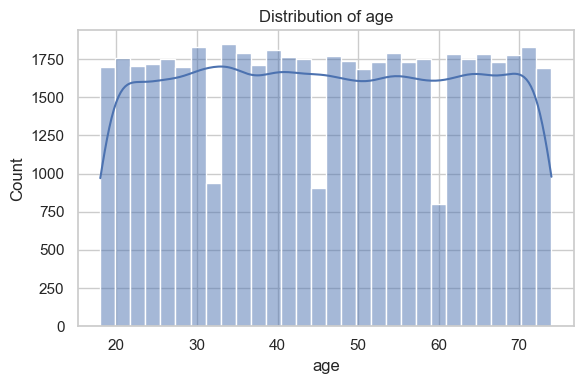

C:\Users\dis895\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


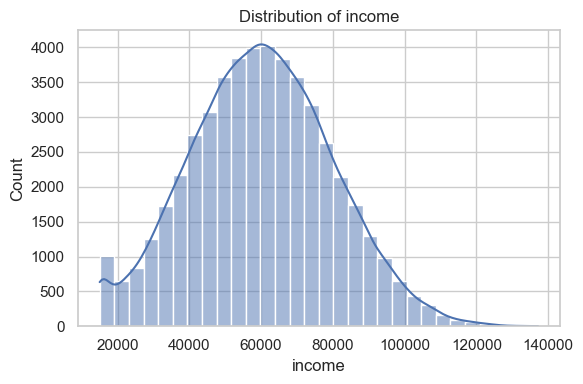

C:\Users\dis895\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


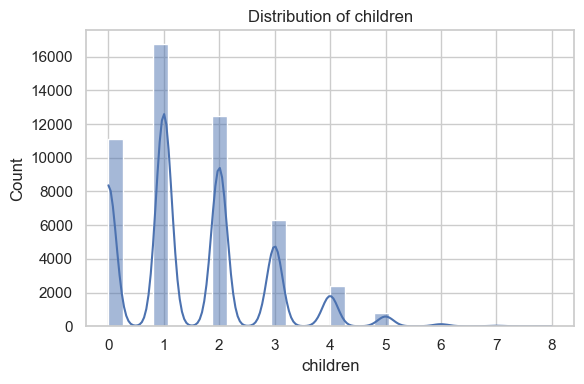

C:\Users\dis895\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


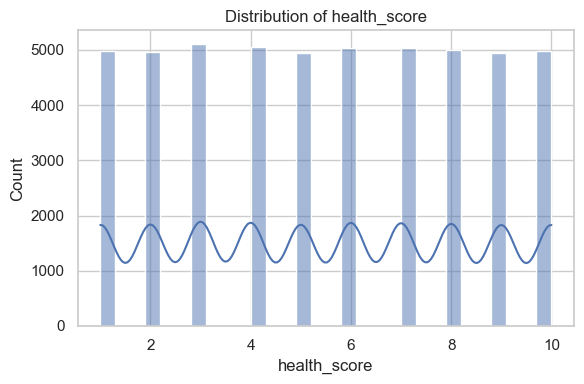

C:\Users\dis895\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


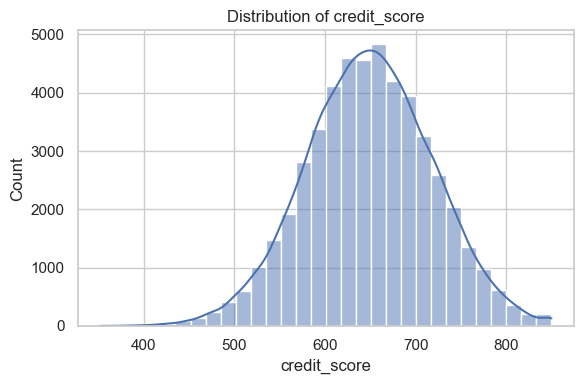

C:\Users\dis895\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


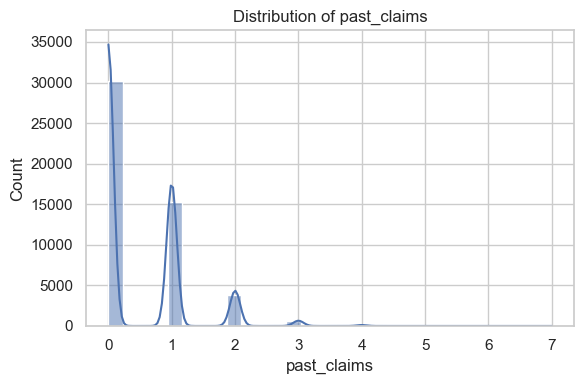

C:\Users\dis895\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


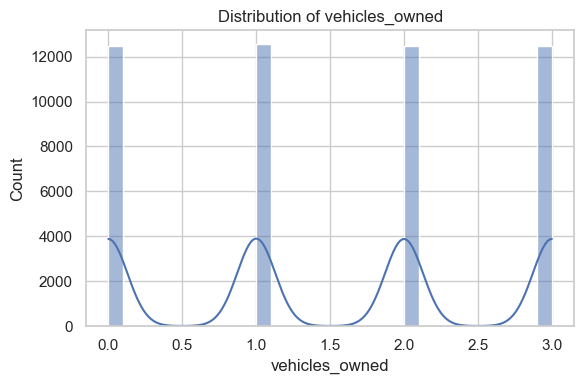

C:\Users\dis895\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


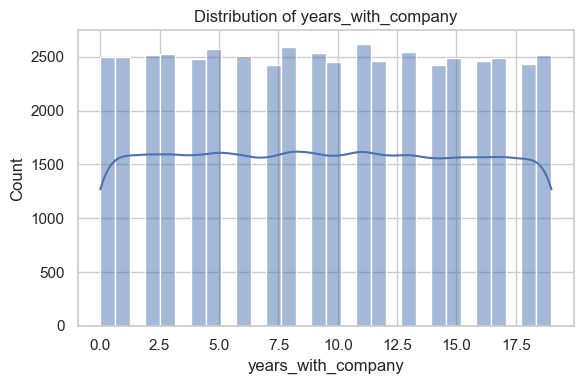

In [18]:
numeric_cols = ['age', 'income', 'children', 'health_score', 'credit_score', 'past_claims', 'vehicles_owned', 'years_with_company']

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()


# Count Plots (Categorical Features)

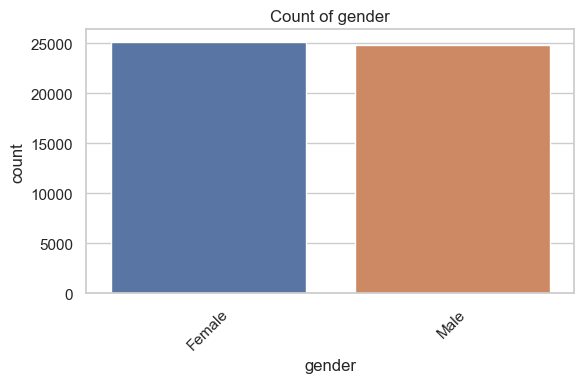

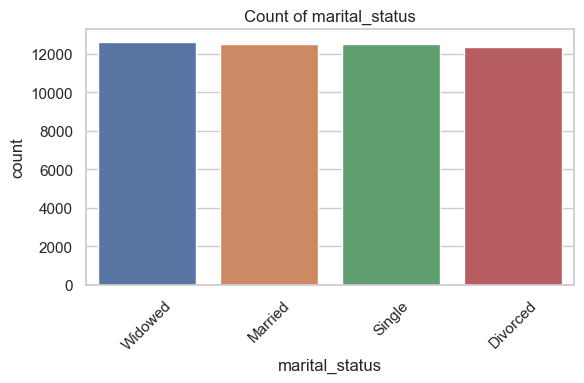

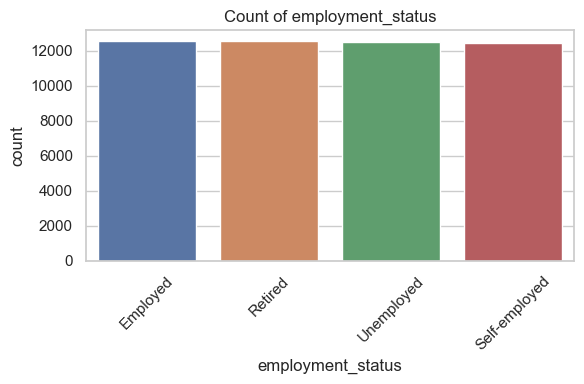

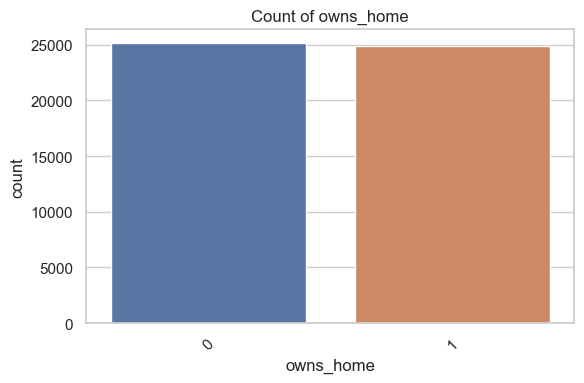

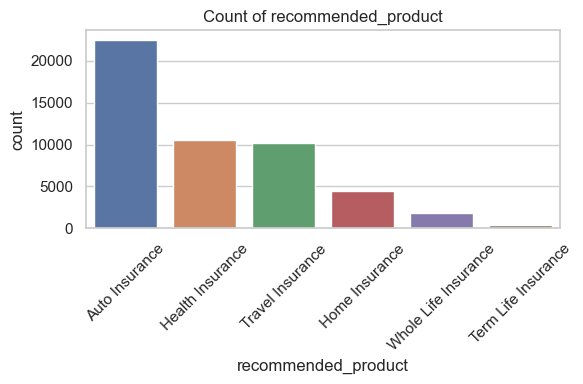

In [14]:
cat_cols = ['gender', 'marital_status', 'employment_status', 'owns_home', 'recommended_product']

for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Correlation Heatmap

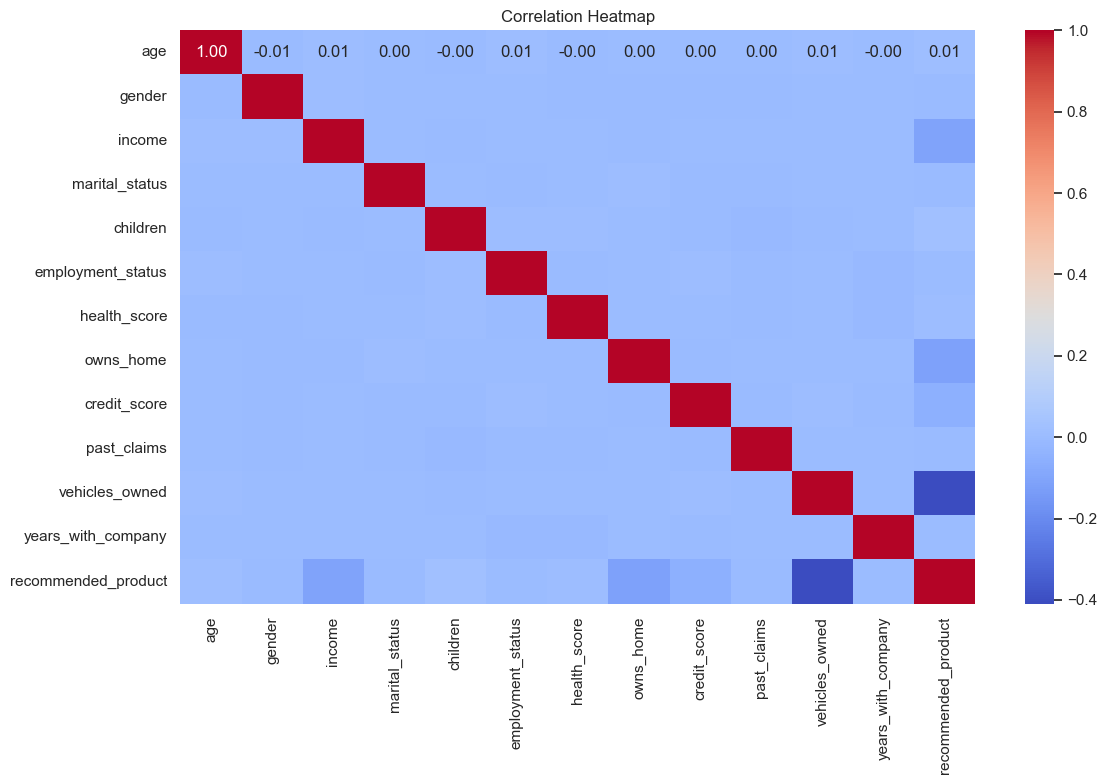

In [15]:
# Encode categorical temporarily for correlation
df_encoded = df.copy()
for col in ['gender', 'marital_status', 'employment_status', 'recommended_product']:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# Boxplots vs. Target Variable

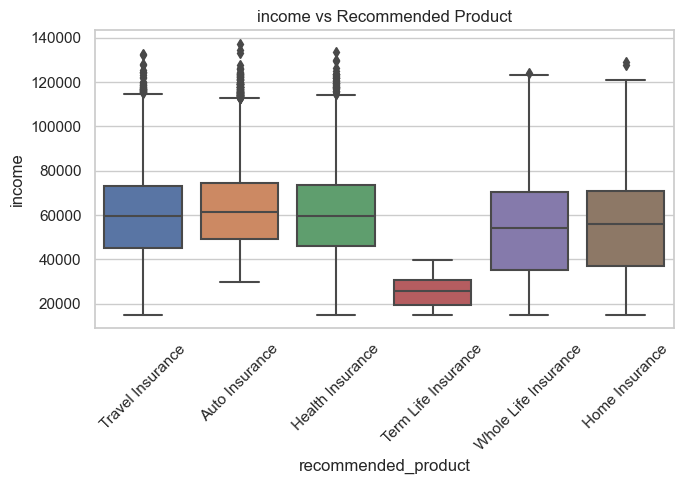

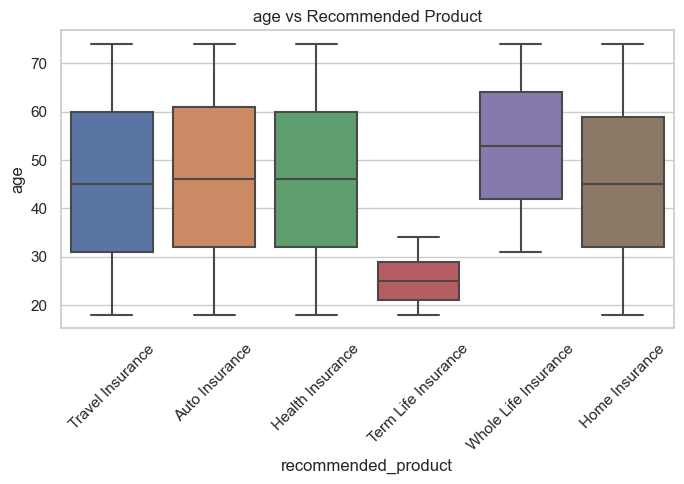

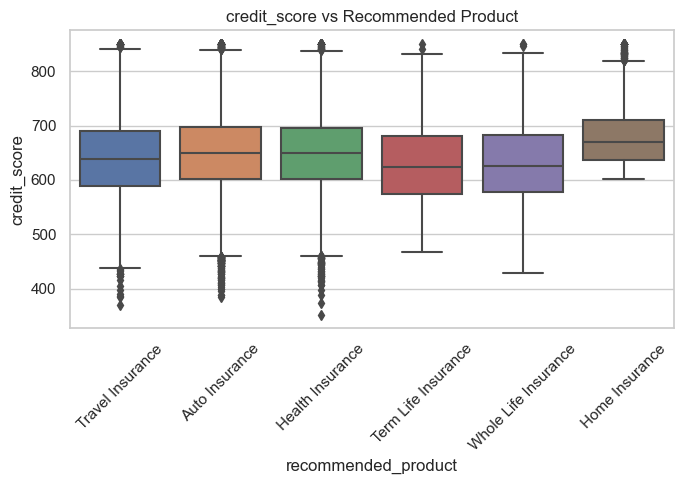

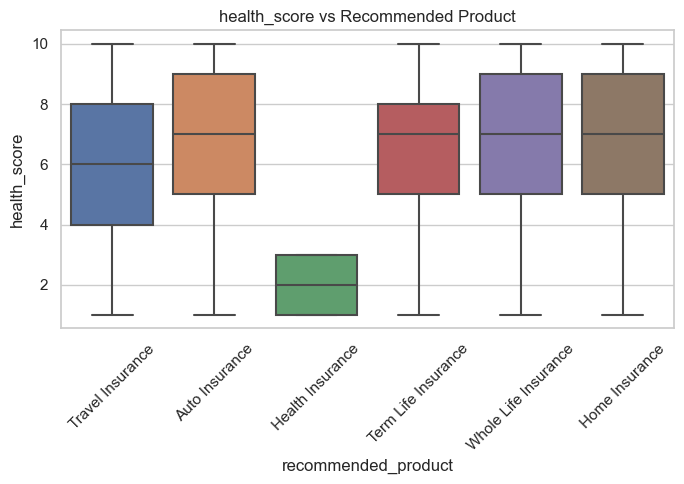

In [17]:
for col in ['income', 'age', 'credit_score', 'health_score']:
    plt.figure(figsize=(7, 5))
    sns.boxplot(x='recommended_product', y=col, data=df)
    plt.title(f'{col} vs Recommended Product')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

np.random.seed(42)

def generate_better_synthetic_data(n=50000):
    age = np.random.randint(18, 75, size=n)
    gender = np.random.choice(['Male', 'Female'], size=n)
    income = np.random.normal(60000, 20000, size=n).clip(15000, 150000).astype(int)
    marital_status = np.random.choice(['Single', 'Married', 'Divorced', 'Widowed'], size=n)
    children = np.random.poisson(1.5, size=n)
    employment_status = np.random.choice(['Employed', 'Self-employed', 'Unemployed', 'Retired'], size=n)
    health_score = np.random.randint(1, 11, size=n)
    owns_home = np.random.choice([0, 1], size=n)
    credit_score = np.random.normal(650, 70, size=n).clip(300, 850).astype(int)
    past_claims = np.random.poisson(0.5, size=n)
    vehicles_owned = np.random.randint(0, 4, size=n)
    years_with_company = np.random.randint(0, 20, size=n)

    df = pd.DataFrame({
        'age': age,
        'gender': gender,
        'income': income,
        'marital_status': marital_status,
        'children': children,
        'employment_status': employment_status,
        'health_score': health_score,
        'owns_home': owns_home,
        'credit_score': credit_score,
        'past_claims': past_claims,
        'vehicles_owned': vehicles_owned,
        'years_with_company': years_with_company
    })

    # Add small noise to simulate real-world unpredictability
    noise = np.random.rand(n)
    
    def recommend(row, noise):
        if row['health_score'] < 4 and noise < 0.7:
            return 'Health Insurance'
        elif row['vehicles_owned'] > 0 and row['income'] > 30000 and noise < 0.85:
            return 'Auto Insurance'
        elif row['owns_home'] and row['credit_score'] > 600 and noise < 0.9:
            return 'Home Insurance'
        elif row['children'] >= 2 and row['age'] > 30 and noise < 0.8:
            return 'Whole Life Insurance'
        elif row['income'] < 40000 and row['age'] < 35 and noise < 0.75:
            return 'Term Life Insurance'
        else:
            return 'Travel Insurance'
    
    df['recommended_product'] = [
        recommend(row, noise[i]) for i, row in df.iterrows()
    ]

    return df

df = generate_better_synthetic_data()

# Encode categoricals
df_encoded = df.copy()
label_encoders = {}
for col in ['gender', 'marital_status', 'employment_status', 'recommended_product']:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Features and target
X = df_encoded.drop(columns=['recommended_product'])
y = df_encoded['recommended_product']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=42)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', max_depth=6, subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
print("\nRandom Forest Performance:")
print("Precision:", round(precision_score(y_test, y_pred_rf, average='weighted'), 4))
print("Recall:", round(recall_score(y_test, y_pred_rf, average='weighted'), 4))
print("F1 Score:", round(f1_score(y_test, y_pred_rf, average='weighted'), 4))

print("\nXGBoost Performance:")
print("Precision:", round(precision_score(y_test, y_pred_xgb, average='weighted'), 4))
print("Recall:", round(recall_score(y_test, y_pred_xgb, average='weighted'), 4))
print("F1 Score:", round(f1_score(y_test, y_pred_xgb, average='weighted'), 4))



Random Forest Performance:
Precision: 0.8432
Recall: 0.8139
F1 Score: 0.794

XGBoost Performance:
Precision: 0.8298
Recall: 0.8095
F1 Score: 0.791


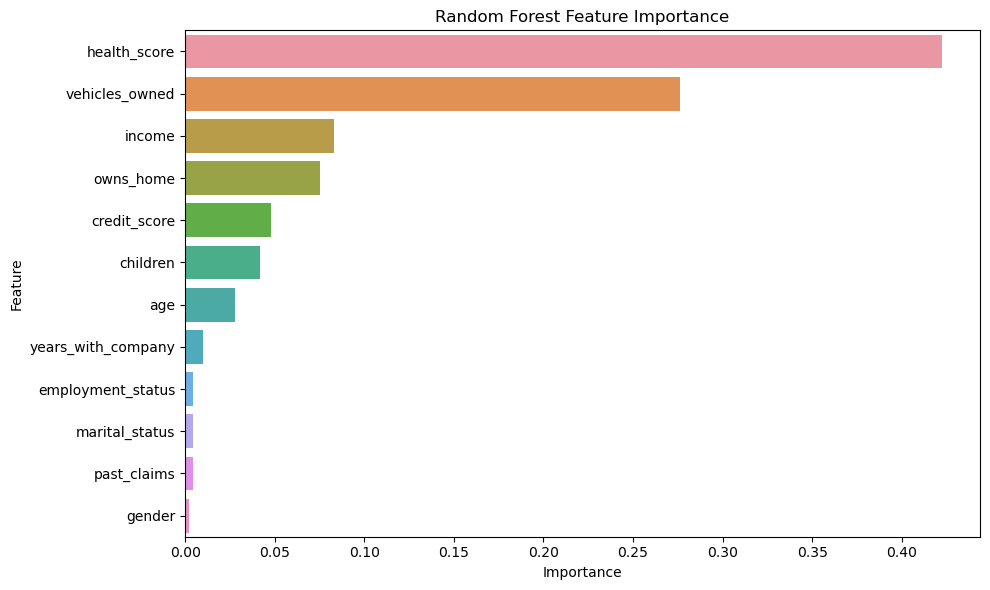

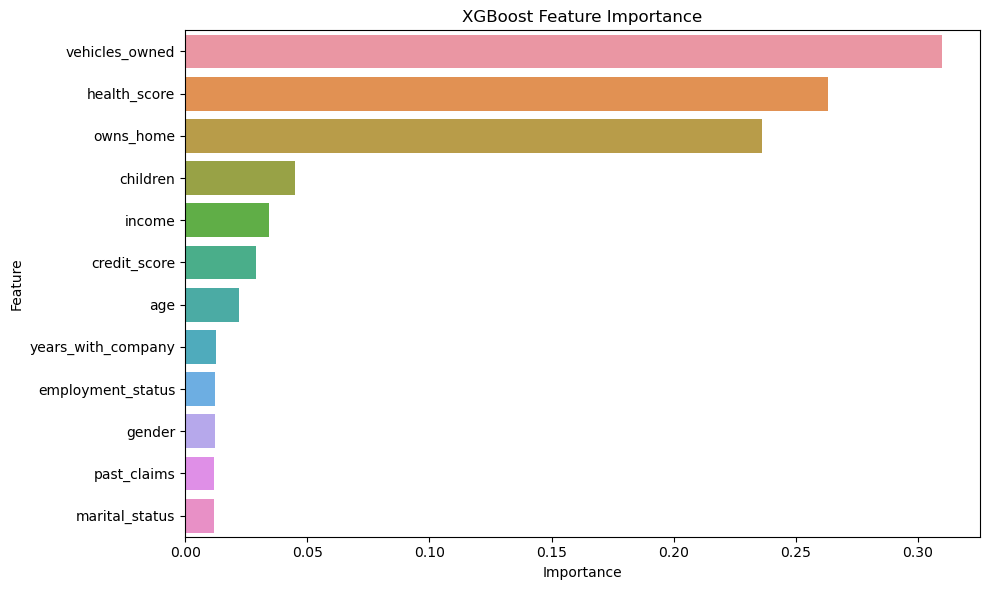

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Feature names from original dataframe
feature_names = X.columns

# --- Feature Importance: Random Forest ---
rf_importance = rf_model.feature_importances_
rf_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_importance_df)
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

# --- Feature Importance: XGBoost ---
xgb_importance = xgb_model.feature_importances_
xgb_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': xgb_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_importance_df)
plt.title('XGBoost Feature Importance')
plt.tight_layout()
plt.show()



In [6]:
import pickle

# Save XGBoost model
with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

# Also save the scaler and label encoders needed for preprocessing
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)


In [5]:
df.head()

,age,gender,income,marital_status,children,employment_status,health_score,owns_home,credit_score,past_claims,vehicles_owned,years_with_company,recommended_product
0,56,Female,68794,Widowed,4,Employed,4,1,544,0,1,8,Travel Insurance
1,69,Male,69282,Single,1,Self-employed,10,0,600,0,0,16,Travel Insurance
2,46,Female,69735,Single,2,Self-employed,7,1,632,1,2,4,Auto Insurance
3,32,Male,77875,Married,3,Retired,8,1,659,1,2,3,Auto Insurance
4,60,Male,55611,Widowed,1,Unemployed,3,0,605,1,3,5,Health Insurance


In [4]:
df['recommended_product'].value_counts()

recommended_product
Auto Insurance          22485
Health Insurance        10585
Travel Insurance        10160
Home Insurance           4478
Whole Life Insurance     1876
Term Life Insurance       416
Name: count, dtype: int64